# Slope 評価

### プロジェクトのルートのパスを通す

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリを一括インポート

In [2]:
import math
import os
import re
import statistics
from collections import deque

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

from funcs.ios import get_excel_sheet
from funcs.technical import SimpleSlope, RegressionSlope, RegressionSlopeFast
from funcs.tide import conv_datetime_from_timestamp

### Matplotlib のフォント設定（オプション）

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

## ティックデータの取得

In [4]:
excel = "ticks_20260105.xlsx"
code = "7011"  # 銘柄コード

path_dir = os.path.join("..", "collection")
path_excel = os.path.join(path_dir, excel)
df = get_excel_sheet(path_excel, code)
df

,Time,Price,Volume
0,1.767572e+09,4001,1720100
1,1.767572e+09,4001,1720100
2,1.767572e+09,4017,1878700
3,1.767572e+09,4017,1878700
4,1.767572e+09,4020,1910400
...,...,...,...
19063,1.767594e+09,4171,35192900
19064,1.767594e+09,4171,35192900
19065,1.767594e+09,4171,35194700
19066,1.767594e+09,4171,35194700


In [5]:
df.index = [pd.to_datetime(conv_datetime_from_timestamp(ts)) for ts in df["Time"]]
df

,Time,Price,Volume
2026-01-05 09:06:04,1.767572e+09,4001,1720100
2026-01-05 09:06:05,1.767572e+09,4001,1720100
2026-01-05 09:06:06,1.767572e+09,4017,1878700
2026-01-05 09:06:07,1.767572e+09,4017,1878700
2026-01-05 09:06:08,1.767572e+09,4020,1910400
...,...,...,...
2026-01-05 15:24:45,1.767594e+09,4171,35192900
2026-01-05 15:24:46,1.767594e+09,4171,35192900
2026-01-05 15:24:47,1.767594e+09,4171,35194700
2026-01-05 15:24:48,1.767594e+09,4171,35194700


In [6]:
period = 30
obj_slope_1 = SimpleSlope(period)
obj_slope_2 = RegressionSlope(period)
obj_slope_3 = RegressionSlopeFast(period)

list_slope_1 = list()
for price in df["Price"]:
    list_slope_1.append(obj_slope_1.update(price))
df["SimpleSlope"] = list_slope_1

list_slope_2 = list()
for price in df["Price"]:
    list_slope_2.append(obj_slope_2.update(price))
df["RegressionSlope"] = list_slope_2

list_slope_3 = list()
for price in df["Price"]:
    list_slope_3.append(obj_slope_3.update(price))
df["RegressionSlopeFast"] = list_slope_3

df

,Time,Price,Volume,SimpleSlope,RegressionSlope,RegressionSlopeFast
2026-01-05 09:06:04,1.767572e+09,4001,1720100,0.000000,0.000000,0.000000
2026-01-05 09:06:05,1.767572e+09,4001,1720100,0.000000,0.000000,0.000000
2026-01-05 09:06:06,1.767572e+09,4017,1878700,5.333333,9.600000,9.600000
2026-01-05 09:06:07,1.767572e+09,4017,1878700,4.000000,5.714286,5.714286
2026-01-05 09:06:08,1.767572e+09,4020,1910400,3.800000,4.733333,4.733333
...,...,...,...,...,...,...
2026-01-05 15:24:45,1.767594e+09,4171,35192900,0.266667,0.238106,0.238106
2026-01-05 15:24:46,1.767594e+09,4171,35192900,0.266667,0.221040,0.221040
2026-01-05 15:24:47,1.767594e+09,4171,35194700,0.233333,0.206546,0.206546
2026-01-05 15:24:48,1.767594e+09,4171,35194700,0.233333,0.191233,0.191233


In [9]:
print(df[["SimpleSlope", "RegressionSlope", "RegressionSlopeFast"]].describe())

        SimpleSlope  RegressionSlope  RegressionSlopeFast
count  19068.000000     19068.000000         19068.000000
mean       0.070840         0.078753             0.078753
std        0.119226         0.140192             0.140192
min        0.000000         0.000000             0.000000
25%        0.033333         0.019988             0.019988
50%        0.033333         0.044652             0.044652
75%        0.100000         0.093279             0.093279
max        5.333333         9.600000             9.600000


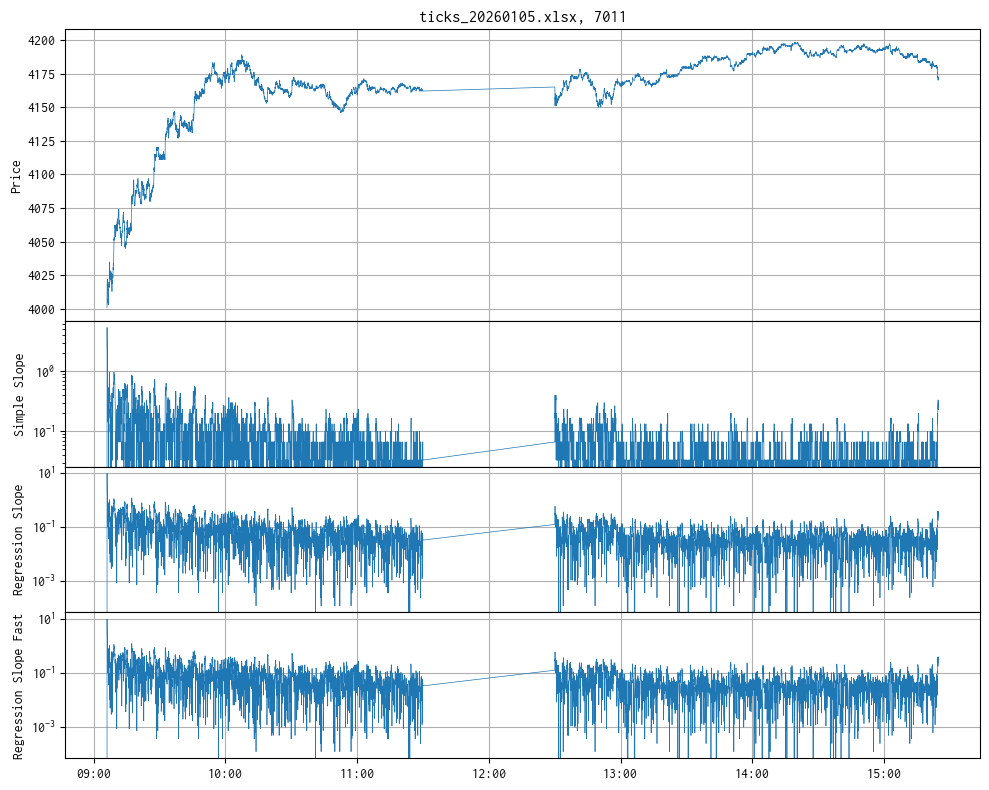

In [8]:
fig = plt.figure(figsize=(10, 8))
n = 4
ax = dict()
gs = fig.add_gridspec(n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)])
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

ax[0].plot(df["Price"], linewidth=0.5)
ax[0].set_ylabel("Price")

ax[1].plot(df["SimpleSlope"], linewidth=0.5)
ax[1].set_ylabel("Simple Slope")
ax[1].set_yscale("log")

ax[2].plot(df["RegressionSlope"], linewidth=0.5)
ax[2].set_ylabel("Regression Slope")
ax[2].set_yscale("log")

ax[3].plot(df["RegressionSlopeFast"], linewidth=0.5)
ax[3].set_ylabel("Regression Slope Fast")
ax[3].set_yscale("log")

plt.tight_layout()
output = os.path.join("..", "tmp", "slope_evaluation.png")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax[0].set_title(f"{excel}, {code}")
plt.tight_layout()
plt.savefig(output)
plt.show()